1.import essential libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import silhouette_score

read data 

In [2]:
data = pd.read_csv(r"C:\Users\syed9\Downloads\Wine_clust.csv")

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


c:\Users\syed9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\syed9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\syed9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\syed9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

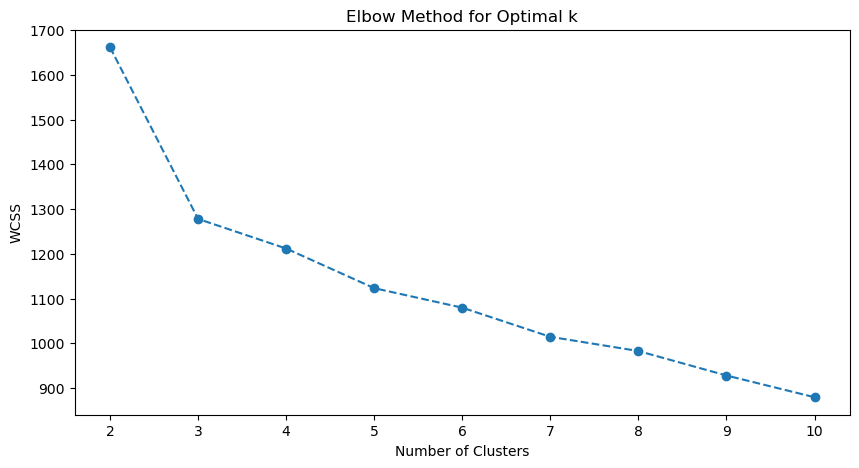

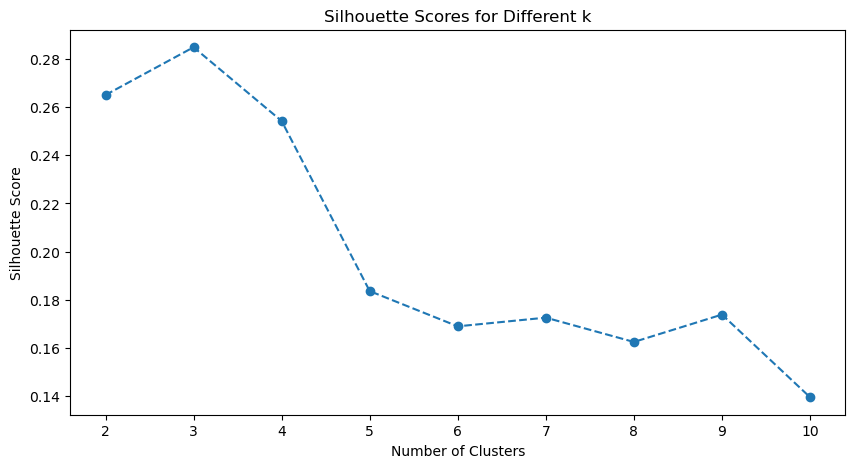

c:\Users\syed9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


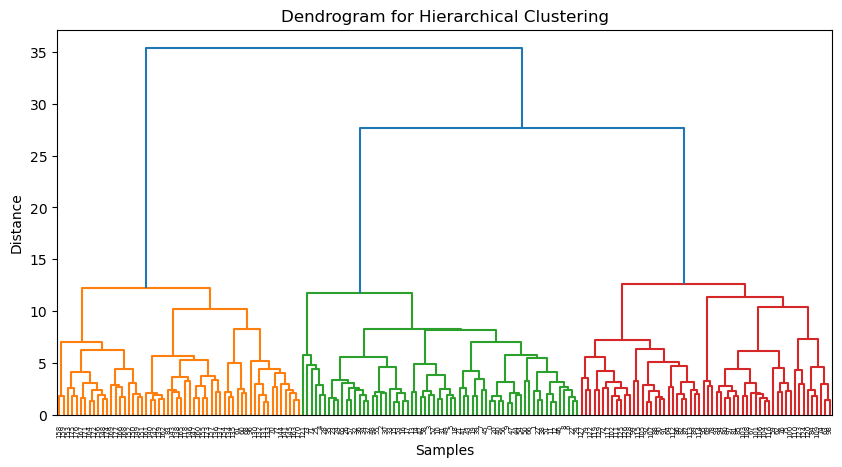

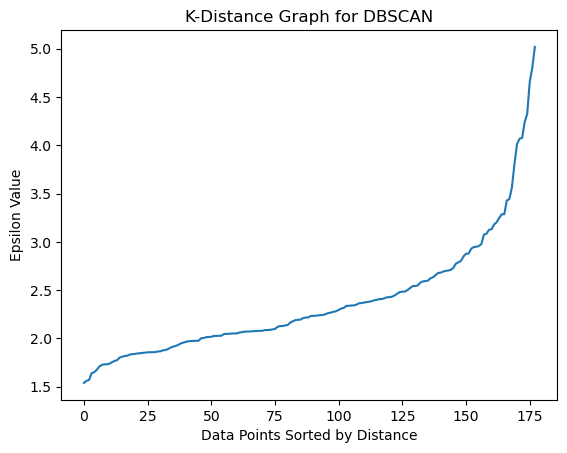

c:\Users\syed9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\syed9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\syed9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\syed9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

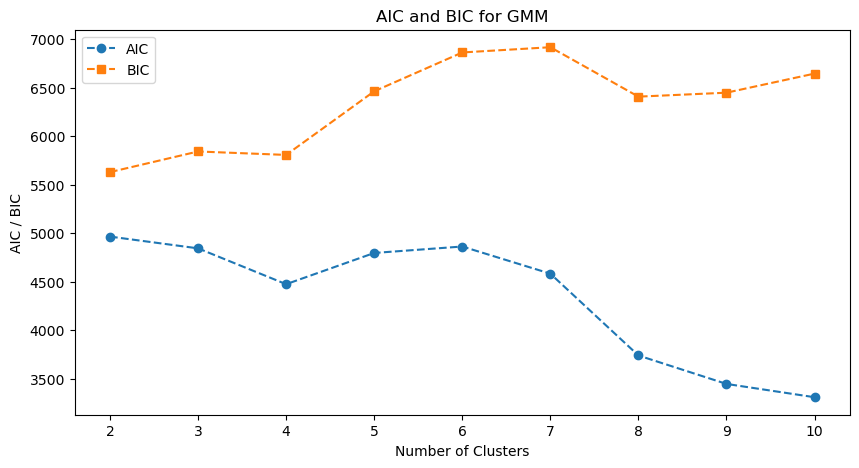

Clustering completed and saved.


c:\Users\syed9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
# Standardizing the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Finding the optimal clusters for K-Means
wcss = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(data_scaled, labels))

# Plot Elbow Method
plt.figure(figsize=(10,5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10,5))
plt.plot(K_range, sil_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

# Train K-Means with optimal clusters
optimal_k = sil_scores.index(max(sil_scores)) + 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
data['KMeans_Cluster'] = kmeans_labels

# Hierarchical Clustering - Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage(data_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=optimal_k)
agglo_labels = agglo.fit_predict(data_scaled)
data['Agglo_Cluster'] = agglo_labels

# DBSCAN - Finding optimal eps using K-Distance Graph
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(data_scaled)
distances, _ = neigh.kneighbors(data_scaled)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("K-Distance Graph for DBSCAN")
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("Epsilon Value")
plt.show()

# Train DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Modify eps based on the graph
dbscan_labels = dbscan.fit_predict(data_scaled)
data['DBSCAN_Cluster'] = dbscan_labels

# Gaussian Mixture Model (GMM)
aic_values = []
bic_values = []
for k in K_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(data_scaled)
    aic_values.append(gmm.aic(data_scaled))
    bic_values.append(gmm.bic(data_scaled))

plt.figure(figsize=(10,5))
plt.plot(K_range, aic_values, marker='o', linestyle='--', label='AIC')
plt.plot(K_range, bic_values, marker='s', linestyle='--', label='BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC / BIC')
plt.title('AIC and BIC for GMM')
plt.legend()
plt.show()

# Train GMM with optimal clusters
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)
data['GMM_Cluster'] = gmm_labels

# Save final dataset with cluster labels
data.to_csv("wine_clustered.csv", index=False)
print("Clustering completed and saved.")
